# Reconstruction using GraphEM

**Expected time to run through: 10 mins**

This tutorial demonstrates how to get a reconstruction using GraphEM, leveraging HadCRUT4 and PAGES2k.

In [28]:
%load_ext autoreload
%autoreload 2

import LMRt
import GraphEM
import os
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as  plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
job = GraphEM.ReconJob()

In [3]:
job.load_configs('./testcases/PAGES2k_HadCRUT/configs.yml', verbose=True)

GraphEM: job.load_configs() >>> loading reconstruction configurations from: ./testcases/PAGES2k_HadCRUT/configs.yml
GraphEM: job.load_configs() >>> job.configs created
GraphEM: job.load_configs() >>> job.configs["job_dirpath"] = /Users/fzhu/Github/GraphEM/docsrc/tutorial/testcases/PAGES2k_HadCRUT/recon
GraphEM: job.load_configs() >>> /Users/fzhu/Github/GraphEM/docsrc/tutorial/testcases/PAGES2k_HadCRUT/recon created
{'anom_period': [1951, 1980],
 'job_dirpath': '/Users/fzhu/Github/GraphEM/docsrc/tutorial/testcases/PAGES2k_HadCRUT/recon',
 'job_id': 'LMRt_quickstart',
 'obs_path': {'tas': './data/obs/HadCRUT.5.0.1.0.analysis.anomalies.ensemble_mean.nc'},
 'obs_varname': {'tas': 'tas_mean'},
 'proxydb_path': './data/proxy/pages2k_dataset.pkl',
 'ptype_list': ['coral.d18O',
                'coral.SrCa',
                'coral.calc',
                'tree.TRW',
                'tree.MXD'],
 'recon_period': [0, 2000]}


In [4]:
job.load_proxydb(verbose=True)

GraphEM: job.load_proxydb() >>> job.configs["proxydb_path"] = /Users/fzhu/Github/GraphEM/docsrc/tutorial/testcases/PAGES2k_HadCRUT/data/proxy/pages2k_dataset.pkl
GraphEM: job.load_proxydb() >>> 692 records loaded
GraphEM: job.load_proxydb() >>> job.proxydb created


In [5]:
job.filter_proxydb(ptype_list=['coral.d18O'], verbose=True)

GraphEM: job.filter_proxydb() >>> job.configs["ptype_list"] = ['coral.d18O']
GraphEM: job.filter_proxydb() >>> filtering proxy records according to: ['coral.d18O']
GraphEM: job.filter_proxydb() >>> 62 records remaining


In [6]:
# ptype_season = {}
# for k, v in job.proxydb.type_dict.items():
#     ptype_season[k] = list(range(1, 13)) # annual
    
# job.seasonalize_proxydb(ptype_season, verbose=True)
job.seasonalize_proxydb(verbose=True)

GraphEM: job.seasonalize_proxydb() >>> job.configs["ptype_season"] = {'coral.d18O': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]}
GraphEM: job.seasonalize_proxydb() >>> seasonalizing proxy records according to: {'coral.d18O': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]}
GraphEM: job.seasonalize_proxydb() >>> 62 records remaining
GraphEM: job.seasonalize_proxydb() >>> job.proxydb updated


In [7]:
job.load_obs(varname_dict={'lat': 'latitude', 'lon': 'longitude', 'tas': 'tas_mean'}, verbose=True)

GraphEM: job.load_obs() >>> loading instrumental observation fields from: {'tas': '/Users/fzhu/Github/GraphEM/docsrc/tutorial/testcases/PAGES2k_HadCRUT/data/obs/HadCRUT.5.0.1.0.analysis.anomalies.ensemble_mean.nc'}
GraphEM: job.load_obs() >>> job.obs created


In [8]:
job.seasonalize_obs(verbose=True)

GraphEM: job.seasonalize_obs() >>> job.configs["obs_season"] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
GraphEM: job.seasonalize_obs() >>> seasonalized obs w/ season [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Dataset Overview
-----------------------

     Name:  tas
   Source:  /Users/fzhu/Github/GraphEM/docsrc/tutorial/testcases/PAGES2k_HadCRUT/data/obs/HadCRUT.5.0.1.0.analysis.anomalies.ensemble_mean.nc
    Shape:  time:171, lat:36, lon:72
GraphEM: job.seasonalize_obs() >>> job.obs updated


/Users/fzhu/Github/LMRt/LMRt/utils.py:258: RuntimeWarning: Mean of empty slice
  tmp = np.nanmean(var[inds, ...], axis=0)


In [9]:
tas = job.obs.fields['tas']
print(tas.time)

[1850 1851 1852 1853 1854 1855 1856 1857 1858 1859 1860 1861 1862 1863
 1864 1865 1866 1867 1868 1869 1870 1871 1872 1873 1874 1875 1876 1877
 1878 1879 1880 1881 1882 1883 1884 1885 1886 1887 1888 1889 1890 1891
 1892 1893 1894 1895 1896 1897 1898 1899 1900 1901 1902 1903 1904 1905
 1906 1907 1908 1909 1910 1911 1912 1913 1914 1915 1916 1917 1918 1919
 1920 1921 1922 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933
 1934 1935 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947
 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961
 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975
 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989
 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019 2020]


In [25]:
recon_time = np.arange(1000, 2001)
nt = np.size(recon_time)
idx = np.arange(nt)
calib = idx[-100:]
nt_tas, nlat, nlon = np.shape(tas.value)

In [18]:
tas_value = job.obs.fields['tas'].value.reshape(np.shape(tas.value)[0], -1)
nt_tas, npos_tas =  np.shape(tas_value)
print(nt_tas, npos_tas)

temp = np.ndarray((nt, npos_tas))
idx_tas = np.array([list(recon_time).index(yr) for yr in tas.time if yr <= recon_time[-1]])
temp[idx_tas] = tas_value[tas.time<=recon_time[-1]]
print(np.size(idx_tas))
print(np.shape(temp))

171 2592
151
(1001, 2592)


In [19]:
npos_proxy = job.proxydb.nrec
lonlat = np.ndarray((npos_tas+npos_proxy, 2))

k = 0
for i in range(tas.nlon):
    for j in range(tas.nlat):
        lonlat[k] = [tas.lon[i], tas.lat[j]]
        k += 1

df_proxy = pd.DataFrame(index=recon_time)
for pid, pobj in job.proxydb.records.items():
    series = pd.Series(index=pobj.time, data=pobj.value, name=pid)
    df_proxy = pd.concat([df_proxy, series], axis=1)
    lonlat[k] = [pobj.lon, pobj.lat]
    k += 1
    
df_proxy = df_proxy[(df_proxy.index>=recon_time[0]) & (df_proxy.index<=recon_time[-1])]
df_proxy

Ocn_075  Ocn_078  Ocn_091  Ocn_086   Ocn_076  Ocn_099  Ocn_178  \
1000.0      NaN      NaN      NaN      NaN       NaN      NaN      NaN   
1001.0      NaN      NaN      NaN      NaN       NaN      NaN      NaN   
1002.0      NaN      NaN      NaN      NaN       NaN      NaN      NaN   
1003.0      NaN      NaN      NaN      NaN       NaN      NaN      NaN   
1004.0      NaN      NaN      NaN      NaN       NaN      NaN      NaN   
...         ...      ...      ...      ...       ...      ...      ...   
1996.0      NaN      NaN    -5.32      NaN -5.016917      NaN -4.70125   
1997.0      NaN      NaN      NaN      NaN -5.024917      NaN -4.53625   
1998.0      NaN      NaN      NaN      NaN -5.157250      NaN -4.49750   
1999.0      NaN      NaN      NaN      NaN -5.048000      NaN -4.85000   
2000.0      NaN      NaN      NaN      NaN -5.042917      NaN      NaN   

        Ocn_177  Ocn_080  Ocn_108  ...   Ocn_146  Ocn_181  Ocn_162  Ocn_125  \
1000.0      NaN      NaN      NaN  ...       NaN      NaN      NaN      NaN   
1001.0      NaN      NaN      NaN  ...       NaN      NaN      NaN      NaN   
1002.0      NaN      NaN      NaN  ...       NaN      NaN      NaN      NaN   
1003.0      NaN      NaN      NaN  ...       NaN      NaN      NaN      NaN   
1004.0      NaN      NaN      NaN  ...       NaN      NaN      NaN      NaN   
...         ...      ...      ...  ...       ...      ...      ...      ...   
1996.0      NaN      NaN      NaN  ... -3.093333      NaN      NaN  -4.7875   
1997.0      NaN      NaN      NaN  ... -3.173333      NaN      NaN      NaN   
1998.0      NaN      NaN      NaN  ... -2.964167      NaN      NaN      NaN   
1999.0      NaN      NaN      NaN  ... -2.984167      NaN      NaN      NaN   
2000.0      NaN      NaN      NaN  ... -2.914167      NaN      NaN      NaN   

        Ocn_090  Ocn_119  Ocn_097  Ocn_087  Ocn_169   Ocn_071  
1000.0      NaN      NaN      NaN      NaN      NaN       NaN  
1001.0      NaN      NaN      NaN      NaN      NaN       NaN  
1002.0      NaN      NaN      NaN      NaN      NaN       NaN  
1003.0      NaN      NaN      NaN      NaN      NaN       NaN  
1004.0      NaN      NaN      NaN      NaN      NaN       NaN  
...         ...      ...      ...      ...      ...       ...  
1996.0      NaN      NaN      NaN      NaN      NaN -4.114561  
1997.0      NaN      NaN      NaN      NaN      NaN -4.231963  
1998.0      NaN      NaN      NaN      NaN      NaN -4.427678  
1999.0      NaN      NaN      NaN      NaN      NaN -4.081667  
2000.0      NaN      NaN      NaN      NaN      NaN       NaN  

[1001 rows x 62 columns]

In [20]:
proxy = df_proxy.values
print(np.shape(proxy))
print(np.shape(lonlat))
print(npos_tas+npos_proxy)

(1001, 62)
(2654, 2)
2654


In [21]:
%%time

G = GraphEM.solver.GraphEM()
G.fit(temp, proxy, calib, lonlat=lonlat, graph_method='neighborhood')

pd.to_pickle(G, './testcases/PAGES2k_HadCRUT/recon/G.pkl')

Estimating graph using neighborhood method
Running GraphEM:

Iter     dXmis     rdXmis

001     0.0850     0.0289
002     0.1331     0.0452
003     0.0782     0.0265
004     0.0580     0.0196
005     0.0494     0.0167
006     0.0461     0.0156
007     0.0448     0.0151
008     0.0444     0.0150
009     0.0454     0.0153
010     0.0459     0.0154
011     0.0469     0.0157
012     0.0481     0.0161
013     0.0497     0.0166
014     0.0514     0.0171
015     0.0531     0.0177
016     0.0546     0.0181
017     0.0559     0.0185
018     0.0570     0.0187
019     0.0580     0.0190
020     0.0592     0.0193
021     0.0606     0.0197
022     0.0622     0.0201
023     0.0641     0.0206
024     0.0663     0.0212
025     0.0688     0.0219
026     0.0715     0.0226
027     0.0744     0.0233
028     0.0777     0.0242
029     0.0813     0.0251
030     0.0852     0.0260
031     0.0892     0.0270
032     0.0934     0.0280
033     0.0979     0.0290
034     0.1020     0.0298
035     0.1063     0.0307
03

In [22]:
V = GraphEM.solver.verif_stats(G.temp_r, temp, calib)
print(V)

Mean MSE = nan, Mean RE = nan, Mean CE = nan, Mean R2 = nan


In [47]:
print(job.proxydb.lons)

[43.58, 40.1, 179.2333, 124.833, 40.1, 210.1667, 200.1722, 202.7527, 34.32, 166.99, 197.87, 295.3, 173.0, 34.97, 134.2503, 113.749, 293.0, 34.97, 151.9772, 293.25, 179.23, 39.5, 55.0, 279.83, 153.0, 145.82, 166.04, 283.947, 134.3837, 34.31, 295.01120000000003, 295.3, 299.15, 283.423, 144.8359, 279.25, 113.77, 55.25, 146.0333, 142.1941, 200.1722, 166.9283, 115.5757, 113.965, 45.1, 45.1, 98.52, 179.2333, 43.58, 278.0, 172.0, 43.6195, 337.1117, 167.2, 250.7869, 200.1722, 144.8833, 250.7869, 145.8167, 268.77, 299.15, 298.51]


In [23]:
np.shape(G.temp_r)

(1001, 2592)

In [27]:
recon = G.temp_r.reshape((nt, nlat, nlon))
print(np.shape(recon))

(1001, 36, 72)


In [32]:
nino = LMRt.utils.nino_indices(recon, tas.lat, tas.lon)
print(np.shape(nino['nino3.4']))

(1001,)


In [36]:
ts_recon = LMRt.Series(time=np.arange(1000, 2001), value=nino['nino3.4'])

In [37]:
from scipy.io import loadmat

data = loadmat('./testcases/PAGES2k_HadCRUT/data/obs/NINO34_BC09.mat')
syr, eyr = 1873, 2000
nyr = eyr-syr+1
nino34 = np.zeros(nyr)
for i in range(nyr):
    nino34[i] = np.mean(data['nino34'][i*12:12+i*12])

ts_target = LMRt.Series(time=np.arange(syr, eyr+1), value=nino34, label='BC09')

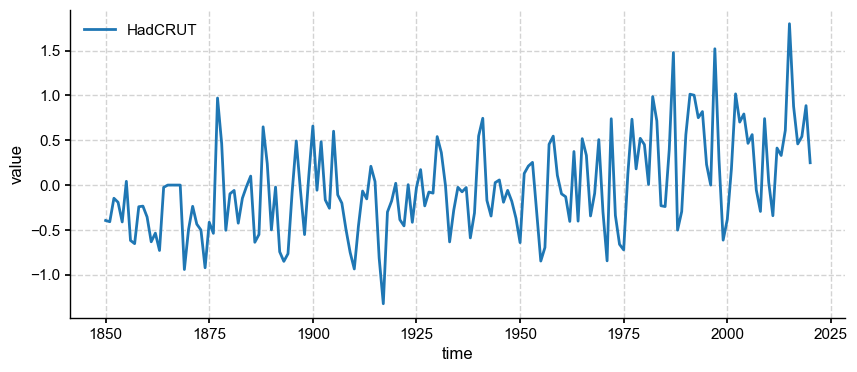

In [46]:
ts_hadcrut = LMRt.Series(
    time=tas.time,
    value=LMRt.utils.nino_indices(tas.value, tas.lat, tas.lon)['nino3.4'],
    label='HadCRUT',
)
fig, ax = ts_hadcrut.plot()

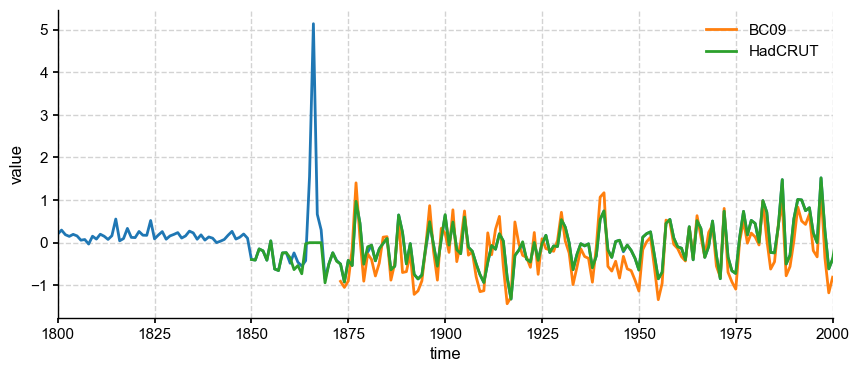

In [47]:
# plot and validate the NINO3.4
fig, ax = ts_recon.plot(mute=True)
ax.set_xlim(1800, 2000)
ts_target.plot(ax=ax)
ts_hadcrut.plot(ax=ax)
LMRt.showfig(fig)